Proyecto y estimaciones del evento carnavalesco

💰 INVERSIÓN FIJA INICIAL (Riesgo): S/ 5870
--------------------------------------------------
📌 ESCENARIO PMSISTA (MIEDO):
   👥 Gente: 60 | 🍺 Chela vendida: 30%
   💵 Ingresos: 4480 | 📉 Gastos: 6920
   👉 RESULTADO: S/ -2439.94
--------------------
📌 ESCENARIO REALISTA (BASE):
   👥 Gente: 100 | 🍺 Chela vendida: 60%
   💵 Ingresos: 7840 | 📉 Gastos: 7970
   👉 RESULTADO: S/ -129.88
--------------------
📌 ESCENARIO OPTIMISTA (FIESTA):
   👥 Gente: 150 | 🍺 Chela vendida: 90%
   💵 Ingresos: 11190 | 📉 Gastos: 9020
   👉 RESULTADO: S/ 2170.18
--------------------


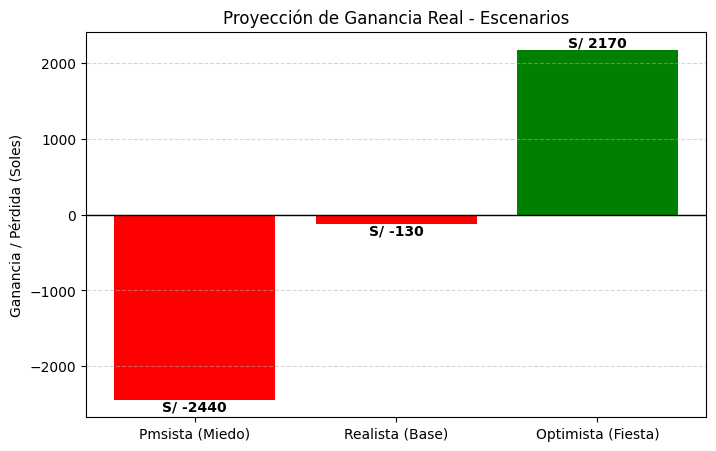

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. DEFINICIÓN DE COSTOS INEVITABLES (Sunk Costs) ---
# Todo lo que gastas sí o sí antes de abrir la puerta
costos_fijos_estructura = {
    "Artistas/Música": 2000,
    "Escenario": 500,
    "Sonido": 500,
    "Movilidad": 200,
    "Decoración (Inc. Polos)": 120, # <-- Aquí está el costo de los polos
    "Sillas/Mesas": 250,
    "Cerco": 100,
    "Personal": 100,
    "Seguridad": 100,
    "Publicidad": 300
}

# La comida se cocina antes, así que el gasto se hace sí o sí (Riesgo)
costo_insumos_comida = 600 + 100 + 700 + 250 + 50 # Chancho, Carne, Brochetas, Fruti
total_riesgo_inicial = sum(costos_fijos_estructura.values()) + costo_insumos_comida

# --- 2. FUNCIÓN DEL MOTOR DE SIMULACIÓN ---
def simular_carnaval(asistentes, porcentaje_venta_cerveza, porcentaje_venta_comida):
    """
    Calcula la ganancia basada en variables inciertas.
    """
    # A. INGRESOS POR ENTRADAS
    # Asumimos: Si hay 50 polos, los primeros 50 compran la entrada cara (S/25), el resto General (S/15)
    if asistentes <= 50:
        entradas_polo = asistentes
        entradas_general = 0
    else:
        entradas_polo = 50
        entradas_general = asistentes - 50
        
    ingreso_entradas = (entradas_polo * 25) + (entradas_general * 15)
    
    # B. INGRESOS POR COMIDA (Stock limitado)
    # Stock Total Platos = 50 Chancho + 50 Carne + 50 Brochetas + 20 Jarras = 170 items aprox
    # Simplificamos: Capacidad máxima de venta en dinero de comida/frutillada
    venta_max_comida = (50*25) + (50*25) + (50*10) + (20*10) # = 3200 soles potenciales
    ingreso_comida = venta_max_comida * (porcentaje_venta_comida / 100)
    
    # C. NEGOCIO CERVEZA (Consignación)
    stock_botellas = 600 # 50 cajas
    botellas_vendidas = stock_botellas * (porcentaje_venta_cerveza / 100)
    
    ingreso_cerveza = botellas_vendidas * 10 # Precio venta
    costo_cerveza_vendida = botellas_vendidas * 5.833 # Costo unitario (3500/600)
    ganancia_neta_cerveza = ingreso_cerveza - costo_cerveza_vendida
    
    # D. RESULTADO FINAL
    ingresos_totales = ingreso_entradas + ingreso_comida + ingreso_cerveza
    gastos_totales = total_riesgo_inicial + costo_cerveza_vendida
    utilidad = ingresos_totales - gastos_totales
    
    return utilidad, ingresos_totales, gastos_totales

# --- 3. DEFINIMOS LOS 3 ESCENARIOS ---
escenarios = [
    # Caso 1: Mala suerte (Lluvia, competencia, poca gente)
    {"Nombre": "Pmsista (Miedo)", "Gente": 60, "% Chela": 30, "% Comida": 40},
    
    # Caso 2: Lo esperado (Tu mínimo de 100 personas)
    {"Nombre": "Realista (Base)", "Gente": 100, "% Chela": 60, "% Comida": 70},
    
    # Caso 3: Éxito Total (Local lleno, gente con sed)
    {"Nombre": "Optimista (Fiesta)", "Gente": 150, "% Chela": 90, "% Comida": 95}
]

# --- 4. EJECUTAMOS LA SIMULACIÓN ---
nombres = []
ganancias = []
colores = []

print(f"💰 INVERSIÓN FIJA INICIAL (Riesgo): S/ {total_riesgo_inicial}")
print("-" * 50)

for esc in escenarios:
    util, ing, gas = simular_carnaval(esc["Gente"], esc["% Chela"], esc["% Comida"])
    nombres.append(esc["Nombre"])
    ganancias.append(util)
    
    # Color de la barra según si ganamos o perdemos
    colores.append('red' if util < 0 else 'green')
    
    print(f"📌 ESCENARIO {esc['Nombre'].upper()}:")
    print(f"   👥 Gente: {esc['Gente']} | 🍺 Chela vendida: {esc['% Chela']}%")
    print(f"   💵 Ingresos: {ing:.0f} | 📉 Gastos: {gas:.0f}")
    print(f"   👉 RESULTADO: S/ {util:.2f}")
    print("-" * 20)

# --- 5. GRÁFICO DE RESULTADOS ---
plt.figure(figsize=(8, 5))
barras = plt.bar(nombres, ganancias, color=colores)
plt.axhline(0, color='black', linewidth=1) # Línea de cero
plt.title("Proyección de Ganancia Real - Escenarios")
plt.ylabel("Ganancia / Pérdida (Soles)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Poner etiquetas de valor en las barras
for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"S/ {yval:.0f}", ha='center', va='bottom' if yval > 0 else 'top', fontweight='bold')

plt.show()

Matriz de escenarios 

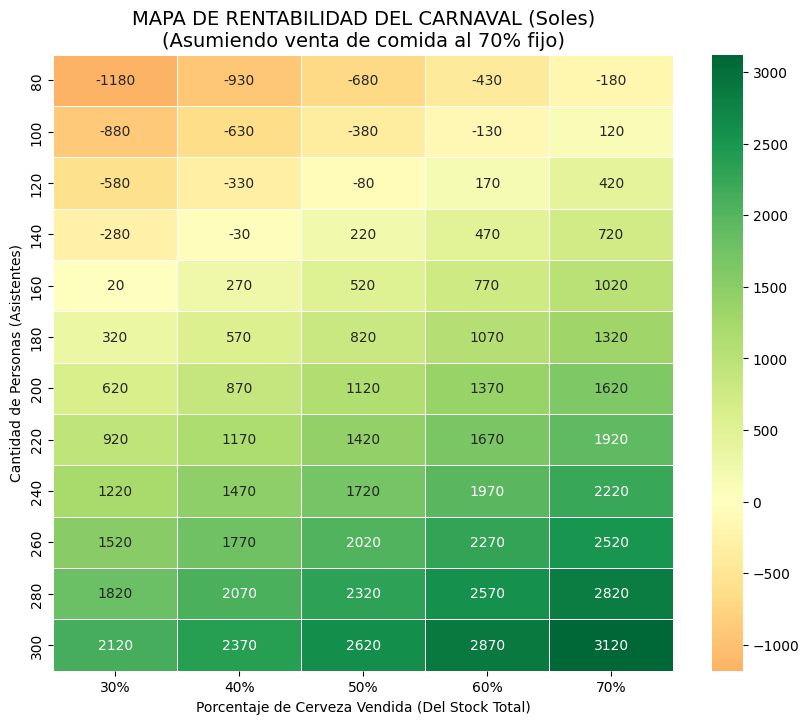

In [2]:
import pandas as pd
import seaborn as sns # Esta librería hace los mapas de calor hermosos
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURACIÓN DE COSTOS (Tus datos) ---
# Costos que PAGAS SÍ O SÍ (Estructura + Insumos de Comida que se cocinan)
costos_fijos_total = (
    2000 + 500 + 500 + 200 + 120 + 250 + 100 + 100 + 100 + 300 # Estructura
    + 600 + 100 + 700 + 250 + 50 # Insumos Comida (Riesgo hundido)
)

# --- 2. CONFIGURACIÓN DE PARÁMETROS FIJOS ---
# Asumimos que la comida se vende al 70% sí o sí como dijiste
venta_total_comida_potencial = (50*25) + (50*25) + (50*10) + (20*10) # ~3200 soles
ingreso_comida_fijo = venta_total_comida_potencial * 0.70 # El 70% asegurado

# Datos Cerveza (Economía Unitaria)
stock_botellas = 600 # 50 cajas
precio_venta_chela = 10
costo_unitario_chela = 3500 / 600 # 5.83 soles

# --- 3. GENERADOR DE ESCENARIOS (Bucles Anidados) ---
resultados = []

# Rango de GENTE: De 80 a 300, subiendo de 20 en 20
rango_personas = range(80, 320, 20)
# Rango de SED (% Cerveza): De 30% a 70%, subiendo de 10 en 10
rango_sed = range(30, 80, 10)

for gente in rango_personas:
    for sed_pct in rango_sed:
        
        # A. CALCULO ENTRADAS
        # Primeros 50 pagan 25 (con polo), el resto 15 (general)
        if gente <= 50:
            ingreso_entradas = gente * 15
        else:
            ingreso_entradas = (50 * 25) + ((gente - 50) * 15)
            
        # B. CALCULO CERVEZA
        botellas_vendidas = stock_botellas * (sed_pct / 100)
        ingreso_cerveza = botellas_vendidas * precio_venta_chela
        costo_variable_cerveza = botellas_vendidas * costo_unitario_chela
        ganancia_neta_cerveza = ingreso_cerveza - costo_variable_cerveza
        
        # C. SUMA FINAL
        ingresos_totales = ingreso_entradas + ingreso_comida_fijo + ingreso_cerveza
        gastos_totales = costos_fijos_total + costo_variable_cerveza
        
        utilidad = ingresos_totales - gastos_totales
        
        # Guardamos el dato
        resultados.append({
            "Asistentes": gente,
            "% Venta Chela": f"{sed_pct}%",
            "Ganancia": utilidad
        })

# --- 4. CREAMOS LA TABLA PIVOTE ---
df_simulacion = pd.DataFrame(resultados)
# Convertimos la lista en una matriz (Filas x Columnas)
matriz = df_simulacion.pivot(index="Asistentes", columns="% Venta Chela", values="Ganancia")

# --- 5. GRAFICAMOS EL MAPA DE CALOR ---
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, fmt=".0f", cmap="RdYlGn", center=0, linewidths=.5)

plt.title("MAPA DE RENTABILIDAD DEL CARNAVAL (Soles)\n(Asumiendo venta de comida al 70% fijo)", fontsize=14)
plt.ylabel("Cantidad de Personas (Asistentes)")
plt.xlabel("Porcentaje de Cerveza Vendida (Del Stock Total)")
plt.show()

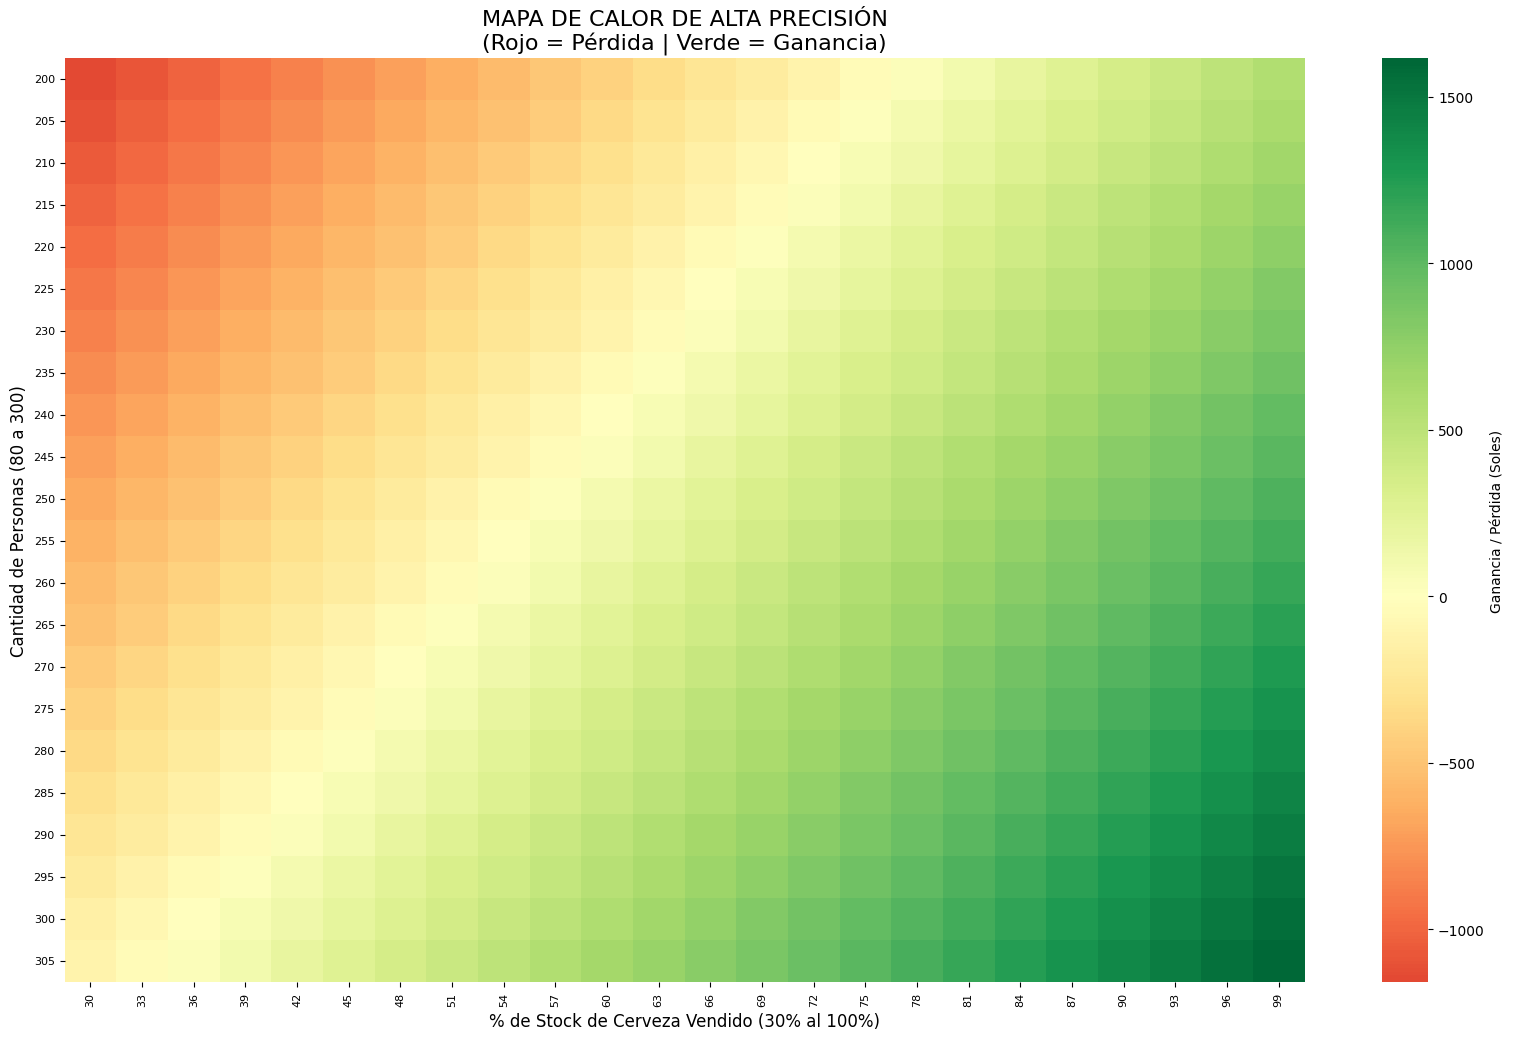

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN DE COSTOS (Igual que antes) ---
costos_fijos_total = (
    2000 + 500 + 500 + 200 + 120 + 250 + 100 + 100 + 100 + 300 # Estructura
    + 600 + 100 + 700 + 250 + 50 + 600  )  # Insumos Comida


# --- 2. PARÁMETROS FIJOS ---
venta_total_comida_potencial = (50*25) + (50*25) + (50*10) + (20*10)
ingreso_comida_fijo = venta_total_comida_potencial * 0.8 # 70% fijo

stock_botellas = 600
precio_venta_chela = 10
costo_unitario_chela = 3500 / 600 # 5.83 soles

# --- 3. GENERADOR DE ALTA RESOLUCIÓN ---
resultados = []

# Rango GENTE: De 80 a 300, de 5 en 5
rango_personas = range(200, 310, 5) 

# Rango SED (%): De 30 a 70, de 1 en 1
rango_sed = range(30, 101, 3)

for gente in rango_personas:
    for sed_pct in rango_sed:
        
        # A. Entradas
        if gente <= 50:
            ingreso_entradas = gente * 20
        else:
            ingreso_entradas = (50 * 10) + ((gente - 50) * 10)
            
        # B. Cerveza
        botellas_vendidas = stock_botellas * (sed_pct / 100)
        ingreso_cerveza = botellas_vendidas * precio_venta_chela
        costo_variable_cerveza = botellas_vendidas * costo_unitario_chela
        ganancia_neta_cerveza = ingreso_cerveza - costo_variable_cerveza
        
        # C. Resultado
        ingresos_totales = ingreso_entradas + ingreso_comida_fijo + ingreso_cerveza
        gastos_totales = costos_fijos_total + costo_variable_cerveza
        utilidad = ingresos_totales - gastos_totales
        
        resultados.append({
            "Asistentes": gente,
            "% Venta Chela": sed_pct, # Lo dejo como número entero para el índice
            "Ganancia": utilidad
        })

# --- 4. CREAR MATRIZ PIVOTE ---
df = pd.DataFrame(resultados)
matriz = df.pivot(index="Asistentes", columns="% Venta Chela", values="Ganancia")

# --- 5. GRAFICAR EN 4K (Ajustado para que se vea bien) ---
plt.figure(figsize=(20, 12)) # Hacemos el gráfico MUY grande

# Usamos annot=False porque hay demasiados números y taparían el color
sns.heatmap(matriz, annot=False, cmap="RdYlGn", center=0, cbar_kws={'label': 'Ganancia / Pérdida (Soles)'})

plt.title("MAPA DE CALOR DE ALTA PRECISIÓN\n(Rojo = Pérdida | Verde = Ganancia)", fontsize=16)
plt.xlabel("% de Stock de Cerveza Vendido (30% al 100%)", fontsize=12)
plt.ylabel("Cantidad de Personas (80 a 300)", fontsize=12)

# Rotar los numeritos de los ejes para que entren todos
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.show()

In [48]:
# Buscador de Dato Exacto
personas = 200
chela = 100

# Verificar existencia y ajustar al valor más cercano si hace falta
if personas not in matriz.index:
    closest_p = min(matriz.index, key=lambda x: abs(x - personas))
    print(f"⚠️ {personas} personas no está en la matriz. Usando {closest_p} (el más cercano).")
    personas = closest_p

if chela not in matriz.columns:
    closest = min(matriz.columns, key=lambda x: abs(x - chela))
    print(f"⚠️ {chela}% no existe en la matriz. Usando {closest}% (el más cercano).")
    chela = closest

dato = matriz.loc[personas, chela]
print(f"💰 Si vienen {personas} personas y venden {chela}% de chela:")
print(f"👉 Resultado: S/ {dato:.2f}")

if dato > 0:
    print("✅ ¡Es Ganancia!")
else:
    print("❌ Es Pérdida.")

⚠️ 100% no existe en la matriz. Usando 99% (el más cercano).
💰 Si vienen 200 personas y venden 99% de chela:
👉 Resultado: S/ 565.00
✅ ¡Es Ganancia!
